# Module 9 Report - Movies, Movies & Movies
## Movie Night - Coupon Recommender Engine!

<br>

By: Billie Kim

Data Source: *Movie Surveys from ANLT 212 (Analytics Computing) collected by Dr. Dana*

## Contents
1. [Objective](#1.-Objective)
2. [Data Exploration](#2.-Data-Exploration)
3. [Dendrogram](#3.-Dendrogram)
4. [Supervised or Unsupervised](#4.-Supervised-or-Unsupervised)
5. [Prediction](#5.-Prediction)
6. [Summary](#6.-Summary)

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Objective

We are tasked by the University of the Pacific's MSDS program to provide insights into movie preferences to host a movie night. Our goal is to use survey data collected by Dr. Dana to cluster student movie genre preferences and build a coupon recommendation engine based on these results.

## 2. Data Exploration

In [ ]:
# load data
df = pd.read_excel('/content/Class_2023_10_18__01_49_QZ_Movies Movies & Movies.xlsx')

In [ ]:
# print dimensions
df.shape

(85, 17)

**Comment:** There are 85 records representing individuals and 17 fields that are survey questions.

In [ ]:
df.head(10)

,Student Name,"Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?","On average, how many movies you watch on a single week",Which of the following movies you'd say is your preferred?,Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow
0,Aiman Anwer,7.5,6.5,8.5,8.5,10.0,10.0,3.5,1.5,8.5,9.5,9.5,1.5,4.5,C. 3) Two movies a week,D. Spiderman\nE. Mulan\nF. Hamilton\nG. Jurass...,- Friendly\n- Motivated\n- Sociable\n- Energet...
1,Aman,7,5,3.0,8.0,3.0,1.0,8.0,9.0,7.0,1.0,10.0,5.0,4.0,A. 1) zero movies. I don't watch movies,D. Spiderman,- Punctual\n- Disciplined \n- Introvert\n- Fas...
2,Aman Sran,4.6,7.4,10.0,8.7,7.5,3.2,3.4,4.5,8.5,6.7,8.4,9.5,2.4,B. 2) One movie a week,B. Shrek,"Sociable, Friendly, Empathetic, Passionate, Co..."
3,Amarthya,7,8,9.0,6.0,7.0,7.0,7.0,1.0,7.0,7.0,8.0,6.0,8.0,B. 2) One movie a week,G. Jurassic Park,AI-driven\nInformative\nMultifunctional\nnonch...
4,Ananta Verma,3.5,7.8,10.0,4.2,6.9,5.5,9.8,6.2,8.0,4.0,8.8,2.0,8.2,B. 2) One movie a week,D. Spiderman,-calm\n-kind\n-introvert\n-passionate\n-funny
5,Bai Wang(Lucas),9,7.5,8.0,5.5,6.7,9.5,10.0,4.5,8.5,5.0,3.5,1.0,10.0,B. 2) One movie a week,A. Star Wars,"friendly, happy, slow"
6,Bhavin Bhatt,10,9,8.0,8.0,8.0,10.0,10.0,3.0,6.0,7.0,6.0,6.0,8.0,B. 2) One movie a week,A. Star Wars\nB. Shrek\nC. Gladiator\nD. Spide...,Chivalrous\nFunny\nSports loving\ninquisitive\...
7,Brittany Ho,3.5,5.5,6.9,8.0,8.0,6.8,7.5,9.0,8.0,6.0,7.0,10.0,7.5,A. 1) zero movies. I don't watch movies,E. Mulan,- Busy\n- Hardworking\n- Happy\n- Warm\n- Adve...
8,CHEN LI LEE,8.0,8.4,7.4,5.6,4.2,8.9,9.8,2.1,3.4,7.6,3.3,6.7,8.8,C. 3) Two movies a week,A. Star Wars\nB. Shrek\nD. Spiderman\nE. Mulan,-JOLLY\n-SLOW
9,Casey,6,6,7.0,8.2,9.8,4.3,8.8,1.9,6.7,9.2,8.3,3.8,4.2,B. 2) One movie a week,C. Gladiator,- attentive\n- optimistic\n- fun\n- analytical...


**Comment:** Column names are survey questions which will be hard to access. We will rename them with key-words.

In [ ]:
# rename columns
df.columns = ['name','action','adventure','comedy','crime','drama','fantasy','scifi','horror','mystery','romance','thriller','documentary','animated','timespent','favorite','personality']

In [ ]:
# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         85 non-null     object 
 1   action       85 non-null     object 
 2   adventure    84 non-null     object 
 3   comedy       83 non-null     float64
 4   crime        83 non-null     float64
 5   drama        83 non-null     float64
 6   fantasy      82 non-null     float64
 7   scifi        82 non-null     float64
 8   horror       82 non-null     float64
 9   mystery      81 non-null     float64
 10  romance      82 non-null     float64
 11  thriller     81 non-null     float64
 12  documentary  82 non-null     float64
 13  animated     81 non-null     float64
 14  timespent    82 non-null     object 
 15  favorite     81 non-null     object 
 16  personality  77 non-null     object 
dtypes: float64(11), object(6)
memory usage: 11.4+ KB


**Comment:** We see the datatypes of each variable. It looks like action and adventure have incorrect datatypes. We will have to look into this and convert the columns to floats later.

In [ ]:
# check missing values
print('total number of missing values:',df.isna().sum().sum(),'\n')
df.isna().sum().sort_values(ascending=False)

total number of missing values: 49 



personality    8
mystery        4
favorite       4
animated       4
thriller       4
timespent      3
documentary    3
romance        3
horror         3
scifi          3
fantasy        3
drama          2
crime          2
comedy         2
adventure      1
action         0
name           0
dtype: int64

**Comment:** Above shows the number missing values in each column. It's not too bad; however, since we only have 85 datapoints we should try to be as conservative as possible and do our best to preserve each record.

In [ ]:
# print rows that have NaN values
df[df.isna().any(axis=1)]

,name,action,adventure,comedy,crime,drama,fantasy,scifi,horror,mystery,romance,thriller,documentary,animated,timespent,favorite,personality
19,Haoxuan Wang,5,7,7.0,7.5,8.5,2.5,NaN,NaN,NaN,NaN,NaN,NaN,5.0,B. 2) One movie a week,D. Spiderman,-Kind\n-Confident\n-Creative\n-Reliable\n-Empa...
28,Lily Veronica,7,8.5,8.0,8.5,9.0,6.0,7.0,7.0,8.0,8.0,NaN,10.0,6.0,B. 2) One movie a week,NaN,"Friendly, fun, happy, foodie, funny"
40,Piyush Patil,6,10,7.5,10.0,10.0,NaN,11.0,10.0,NaN,1.0,10.0,10.0,1.0,B. 2) One movie a week,E. Mulan,Social \nintelligent\nSmart\nEnthusiasm
41,Praneeth,10,9,10.0,11.0,12.0,8.0,9.0,10.0,9.0,8.0,10.0,5.0,9.0,D. 4) Three to four movies a week,C. Gladiator,NaN
44,Revanth,10,9,10.0,8.0,10.0,8.0,9.0,10.0,8.0,9.0,10.0,7.0,8.0,E. 5) More than 4 movies a week,D. Spiderman,NaN
47,SOURABH,7,3,7.0,10.0,10.0,1.0,4.0,5.0,10.0,9.0,10.0,10.0,5.0,E. 5) More than 4 movies a week,C. Gladiator,NaN
51,Sila MyжiHu,who knows man,idk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Vamsi Krishna,8,9,9.0,7.5,6.0,5.0,8.5,7.0,7.3,9.0,6.5,9.5,10.0,C. 3) Two movies a week,D. Spiderman,NaN
65,Vamsi Krishna Midathala,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,akhil,10,10,9.0,9.0,9.0,9.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0,B. 2) One movie a week,B. Shrek\nE. Mulan\nG. Jurassic Park,NaN


**Comment:** Handling NaN values for numerical features:

- It looks like Sila and Vamsi only answered a single question each. Unfortunately, we will have to go ahead and drop these records. They contain no useful information.

- For everyone else: we are going to assume the individuals did not answer because they do not like the movie genre. We will replace NaN values with minimum score of 1. This will be completed in a series of steps below by subsetting the numerical columns. Let's first check to see if there are any other data cleaning steps we have to do for numerical features.

In [ ]:
# drop index 51 and index 65
df.drop([df.index[51],df.index[65]], inplace=True)

In [ ]:
# change column datatypes
df = df.astype({'action':'float','adventure':'float'})

In [ ]:
df.describe()

,action,adventure,comedy,crime,drama,fantasy,scifi,horror,mystery,romance,thriller,documentary,animated
count,83.000000,83.000000,83.000000,83.000000,83.000000,82.000000,82.000000,82.000000,81.000000,82.000000,81.000000,82.000000,81.000000
mean,8.115663,8.022651,8.423240,1212.749639,6.855301,7.271220,8.387195,6.748170,7.993827,7.184390,20.445556,6.590122,7.052963
std,1.811917,1.608907,1.542735,10975.545086,2.331890,2.351857,1.794819,2.947948,1.817835,3.123678,110.221002,2.497070,2.567645
min,2.100000,3.000000,3.000000,2.500000,2.200000,0.000000,2.000000,0.000000,1.200000,-10.000000,1.000000,1.000000,0.000000
25%,7.000000,7.000000,7.900000,7.250000,5.000000,6.275000,8.000000,5.000000,7.500000,6.125000,7.800000,5.000000,5.000000
50%,8.200000,8.300000,8.900000,8.500000,7.000000,7.750000,8.800000,7.550000,8.250000,7.850000,9.000000,7.000000,7.900000
75%,9.900000,9.000000,9.950000,9.900000,8.550000,9.000000,9.875000,9.000000,9.000000,9.425000,10.000000,8.150000,9.000000
max,10.000000,10.100000,10.000000,100000.000000,12.000000,10.000000,11.000000,10.000000,10.000000,10.000000,1000.000000,10.000000,10.500000


**Comment:** The responses should be on a scale from 1 to 10. In other words, the minimum lowest scoring should be 1 and maximum highest scoring should be 10. However, in the printout above, we see negative and 0 values and values that surpass 10.

In [ ]:
# subset numerical columns
cols = ['action','adventure','comedy','crime','drama','fantasy','scifi','horror','mystery','romance','thriller','documentary','animated']
df_sub = df[cols]

# set min = 1 and max = 10
df_sub[df_sub <= 0] = 1
df_sub[df_sub > 10] = 10

# replace NaN with lowest scoring of 1
df_sub.fillna(1, inplace=True)

# add back cleaned numerical columns to original df
df[cols] = df_sub

In [ ]:
# check min and max values again
df.describe()

,action,adventure,comedy,crime,drama,fantasy,scifi,horror,mystery,romance,thriller,documentary,animated
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,8.115663,8.021446,8.423240,8.038795,6.831205,7.207711,8.280120,6.703011,7.825301,7.242410,8.049277,6.522771,6.913133
std,1.811917,1.607370,1.542735,1.941744,2.288000,2.402947,1.939518,2.946270,2.094802,2.639422,2.413311,2.556525,2.665898
min,2.100000,3.000000,3.000000,2.500000,2.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000
25%,7.000000,7.000000,7.900000,7.250000,5.000000,6.100000,8.000000,4.775000,7.150000,6.050000,7.450000,5.000000,5.000000
50%,8.200000,8.300000,8.900000,8.500000,7.000000,7.500000,8.800000,7.500000,8.250000,7.700000,9.000000,7.000000,7.800000
75%,9.900000,9.000000,9.950000,9.900000,8.550000,9.000000,9.850000,9.000000,9.000000,9.350000,10.000000,8.100000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Comment:** Beautiful. The min and max values of each column are satisfactory.

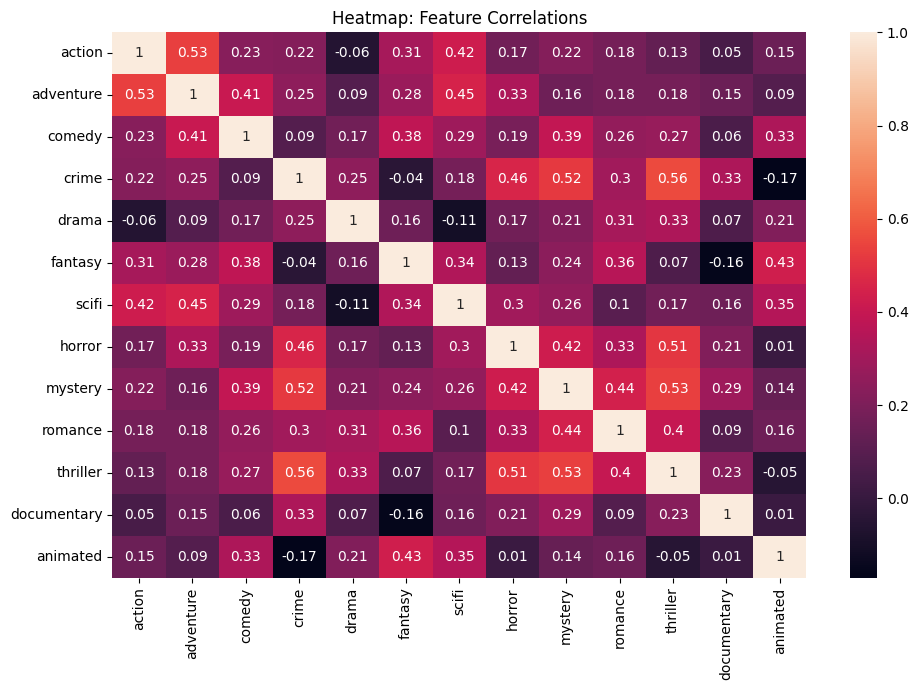

In [ ]:
# plot correlations
plt.figure(figsize=(10,7))
plt.title('Heatmap: Feature Correlations')
sns.heatmap(round(df.corr(),2), annot=True)
plt.tight_layout();

**Comment:** From the correlation heatmap above, we can use this as well as some domaine knowledge to select 3-5 features as inputs for clustering. We will choose action, drama, horror, romance, and documentary.

## 3. Dendrogram

In [ ]:
# subset features
df_features = df[['action','drama','horror','romance','documentary']]

In [ ]:
# instantiate standardscaler and scale data
sc = StandardScaler()
scaled = sc.fit_transform(df_features)

scaled_df = pd.DataFrame(scaled)
scaled_df

,0,1,2,3,4
0,-0.341851,1.393382,-1.776701,0.860535,-1.976631
1,-0.619479,-1.684657,0.784366,-2.379444,-0.599262
2,-1.952095,0.294083,-0.752274,-0.206752,1.171641
3,-0.619479,0.074223,-1.947439,-0.092400,-0.205728
4,-2.562877,0.030251,-0.171766,-1.235922,-1.779864
...,...,...,...,...,...
78,0.491034,0.513943,0.784366,1.051122,1.368407
79,1.046291,0.953662,0.784366,0.669948,0.974874
80,0.491034,0.513943,0.784366,1.051122,0.581340
81,0.491034,0.733803,-0.581537,1.051122,1.368407


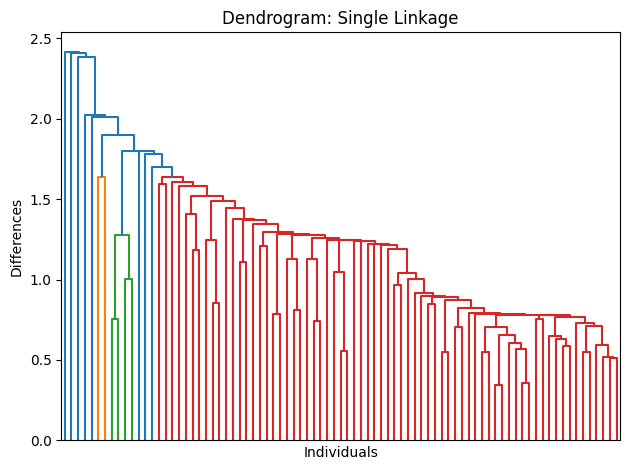

In [ ]:
single_linkage = linkage(scaled_df, method='single')
dendrogram(single_linkage, no_labels=True)

plt.title('Dendrogram: Single Linkage')
plt.xlabel('Individuals'); plt.ylabel('Differences')
plt.tight_layout();

**Comment:** Single Linkage produces 4 very unbalanced looking clusters.

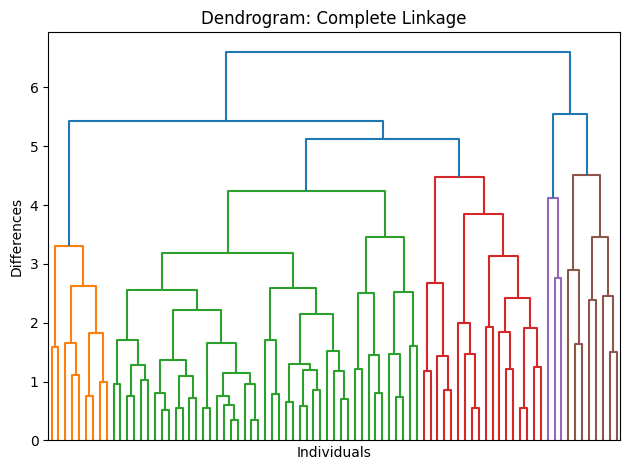

In [ ]:
complete_linkage = linkage(scaled_df, method='complete')
dendrogram(complete_linkage, no_labels=True)

plt.title('Dendrogram: Complete Linkage')
plt.xlabel('Individuals'); plt.ylabel('Differences')
plt.tight_layout();

**Comment:** Complete Linkage produces 5 unbalanced looking clusters.

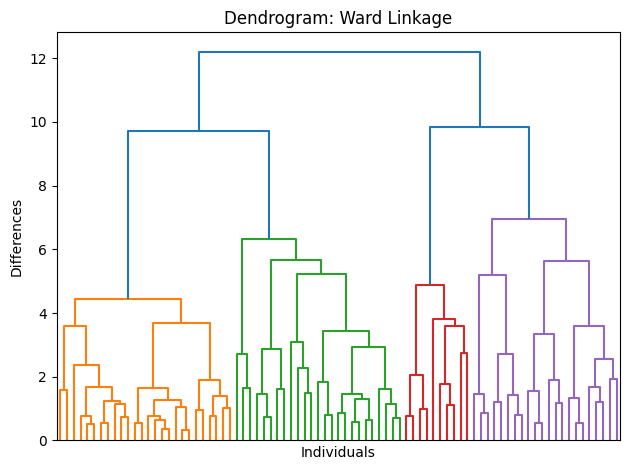

In [ ]:
ward_linkage = linkage(scaled_df, method='ward')
dendrogram(ward_linkage, no_labels=True)

plt.title('Dendrogram: Ward Linkage')
plt.xlabel('Individuals'); plt.ylabel('Differences')
plt.tight_layout();

**Comment:** Ward Linkage produces the best looking clusters with k=4. In the next section, we will run agglomerative clustering using ward linkage and n_cluster = 4.

# 4. Supervised or Unsupervised

In [ ]:
# run agglomerative clustering
agg_clust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_clust.fit_predict(scaled_df)

In [ ]:
# print value counts of each cluster
pd.Series(agg_labels).value_counts()

3    26
1    25
0    22
2    10
dtype: int64

In [ ]:
# add cluster labels to df

df_features['clusters'] = agg_labels

cluster_df = list()

for i in range(0,4):
  c = df_features[df_features.clusters == i]
  cluster_df.append(c)

In [ ]:
# mean summary stats for cluster 0
cluster_df[0].mean()

action         8.731818
drama          6.809091
horror         5.331818
romance        8.109091
documentary    3.972727
clusters       0.000000
dtype: float64

**Comment:** action-romance preference

In [ ]:
# mean summary stats for cluster 1
cluster_df[1].mean()

action         6.288000
drama          7.451600
horror         6.821996
romance        7.356800
documentary    7.603600
clusters       1.000000
dtype: float64

**Comment:** documentary-drama preference

In [ ]:
# mean summary stats for cluster 2
cluster_df[2].mean()

action         8.03
drama          4.38
horror         3.35
romance        2.27
documentary    5.49
clusters       2.00
dtype: float64

**Comment:** action only preference

In [ ]:
# mean summary stats for cluster 3
cluster_df[3].mean()

action         9.384615
drama          7.196154
horror         9.038462
romance        8.311538
documentary    8.038462
clusters       3.000000
dtype: float64

**Comment:** action-horror preference

# 5. Prediction

In [ ]:
# train-test-split and run KNN classification
X_train, X_test, y_train, y_test = train_test_split(df_features.iloc[:,:-1].values, df_features.iloc[:,-1].values, test_size=0.2, random_state=123)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

kNN = KNeighborsClassifier(n_neighbors=4)
kNN.fit(X_tr_scaled, y_train)
y_pred = kNN.predict(scaler.transform(X_test))

Accuracy Score: 1.0


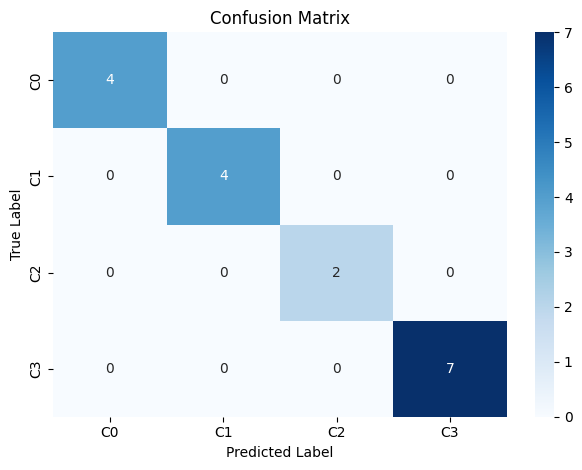

In [ ]:
# print accuracy score and confusion matrix
print("Accuracy Score: " + str(accuracy_score(y_pred,y_test)))

labels = ['C0','C1','C2','C3']
cm= confusion_matrix(y_pred,y_test)
cmat = sns.heatmap(cm,annot=True,cmap='Blues')
cmat.set_title('Confusion Matrix')
cmat.set_xlabel('Predicted Label'); cmat.set_ylabel('True Label')
cmat.xaxis.set_ticklabels(labels); cmat.yaxis.set_ticklabels(labels)
plt.tight_layout();

**Comment:** Using the calculated mean summary stats within each cluster found in the previous section, I was able to infer what genres that the members in each cluster would prefer. The following are going to be the coupon recommendations for each cluster:

- cluster 0: Action-Romance Movie Night

- cluster 1: Docu-Drama Movie Night

- cluster 2: Total Action Marathon Movie Night

- cluster 3: Horror-Action Movie Night

In [ ]:
# function for movie night recommender using kNN Classifer from above
def coupon_recommender(ratings):
  new_data = np.array([ratings[0],ratings[1],ratings[2],ratings[3],ratings[4]]).reshape(1,-1)
  scaled_data = scaler.transform(new_data)
  x = kNN.predict(scaled_data)
  print('cluster: ' + str(int(x)))

  if int(x) == 0:
    return 'Printing... Coupons for Action-Romance Movie Night!'
  elif int(x) == 1:
    return 'Printing... Coupons for Docu-Drama Movie Night!'
  elif int(x) == 2:
    return 'Printing... Coupons for Total Action Marathon Movie Night!'
  else:
    return 'Printing... Coupons for Horror-Action Movie Night!'

**Let's see if the recommender is running properly ...**

In [ ]:
# run 1 -- should print cluster 3
coupon_recommender([10,10,7,10,8])

cluster: 3


'Printing... Coupons for Horror-Action Movie Night!'

In [ ]:
# run 2 -- should print cluster 1
coupon_recommender([3,5,8,10,8])

cluster: 1


'Printing... Coupons for Docu-Drama Movie Night!'

In [ ]:
# run 3 -- should print cluster 2
coupon_recommender([10,4,3,1,6.5])

cluster: 2


'Printing... Coupons for Total Action Marathon Movie Night!'

In [ ]:
# run -- should print cluster 0
coupon_recommender([10,4,3,8,6.5])

cluster: 0


'Printing... Coupons for Action-Romance Movie Night!'

**Comment:** Awesome! The recommender seems to be running properly given the specified input parameters.

**Now, let's see what coupons my friends from class would get ...**

In [ ]:
df_features['name'] = df.name

casey = df_features[df_features.name.str.startswith('Case')].iloc[:,:-2].values[0]
harmeet = df_features[df_features.name.str.startswith('Harme')].iloc[:,:-2].values[0]
ethan = df_features[df_features.name.str.startswith('Etha')].iloc[:,:-2].values[0]
siraz = df_features[df_features.name.str.startswith('Sira')].iloc[:,:-2].values[0]
cody = df_features[df_features.name.str.startswith('Cody')].iloc[:,:-2].values[0]
billie = [6,5,9.5,10,3]

In [ ]:
# run 5
coupon_recommender(casey)

cluster: 0


'Printing... Coupons for Action-Romance Movie Night!'

In [ ]:
# run 6
coupon_recommender(harmeet)

cluster: 2


'Printing... Coupons for Total Action Marathon Movie Night!'

In [ ]:
# run 7
coupon_recommender(ethan)

cluster: 1


'Printing... Coupons for Docu-Drama Movie Night!'

In [ ]:
# run 8
coupon_recommender(siraz)

cluster: 0


'Printing... Coupons for Action-Romance Movie Night!'

In [ ]:
# run 9
coupon_recommender(cody)

cluster: 2


'Printing... Coupons for Total Action Marathon Movie Night!'

In [ ]:
# run 10
coupon_recommender(billie)

cluster: 0


'Printing... Coupons for Action-Romance Movie Night!'

**Comment:**  Very interesting! Based on the coupon recommender, it looks like Casey, Siraz, and myself would be going to the Action-Romance Movie Night while Harmeet and Cody would be going to the Total Action Marathom Movie Night. Unfortunately, Ethan would be going by himself to the Docu-Drama Movie Night... (sorry Ethan!)

## 6. Summary

This report provides an overview into movie preferences for UoP's MSDS students. The dataset contained a total of 85 rows that represents individuals and 17 features that are survey questions. For inputs into clustering, we used a total of 5 scoring features which are: action, drama, horror, romance, and documentary. We found that the best number of clusters was 4 by producing the ward linkage dendrogram which minimizes the variance in clusters. We ran agglomerative clustering to produce cluster labels and built a K-nearest-neighbors classifier to predict on unseen data in the future. The recommendation engine (coupon_recommender) uses the kNN model to classify new datapoints and also prints out which movie night a particular student should go to based on their scores for action, drama, horror, romance, and documentary.